<a href="https://colab.research.google.com/github/singhishita1512/Supervised_Learning1/blob/main/SML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTING PACKAGES
 
import pandas as pd                         # data processing
import numpy as np                          # working with arrays
import matplotlib.pyplot as plt             # visualization
import seaborn as sb                        # visualization
from termcolor import colored as cl         # text customization
from sklearn import model_selection
 
from sklearn.model_selection import train_test_split  # data split
!pip3 install catboost
 
 
from sklearn.linear_model import LinearRegression     # OLS algorithm
from sklearn.linear_model import Ridge                # Ridge algorithm
from sklearn.linear_model import BayesianRidge        # Bayesian algorithm
from sklearn.neighbors import KNeighborsRegressor     # KNN algorithm
from sklearn.ensemble import GradientBoostingRegressor#GradientBoostingRegressor
 
from sklearn import ensemble                          #ExtraTrees Algorithm
from sklearn.ensemble import RandomForestRegressor    #RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor        #DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor        #AdaBoostRegressor
from catboost import CatBoostRegressor                #CatBoost Regressor
import xgboost as xg                                  #XGBoost Regressor
 
from sklearn.model_selection import GridSearchCV      #GridSearch for feature selection
from sklearn.preprocessing import RobustScaler
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2                  # evaluation metric
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import explained_variance_score
 
import matplotlib.pyplot as plt
 
sb.set_style('whitegrid')                 # plot style
plt.rcParams['figure.figsize'] = (10, 10) # plot size

     |████████████████████████████████| 67.3MB 49kB/s 


In [2]:
from google.colab import files
uploaded = files.upload()

Saving P5new.csv to P5new.csv


In [3]:
df = pd.read_csv('P5new.csv')
df.set_index('Sl.no.', inplace = True)

df.head(5)

,Discharge intensity (m3/s/m),Total head H1(m),Bed Material size,Bucket radius (R ),Tail water depth,Lip angle,Depth of scour,Location of max. scour lip,Width of scour
Sl.no.,,,,,,,,,
1,0.1703,0.5083,0.004,0.400,0.1667,0.472,0.5500,1.1116,0.85
2,0.1792,1.4268,0.002,0.406,0.2300,0.612,0.2439,1.9512,0.85
3,0.0842,1.4268,0.002,0.609,0.1500,0.698,0.2246,2.0202,0.92
4,0.0285,0.3188,0.008,0.180,0.0687,0.524,0.1526,0.6500,0.65
5,0.0204,0.2791,0.008,0.100,0.1000,0.524,0.1255,0.5000,0.65


In [4]:
df.dropna(inplace = True)
print(cl(df.isnull().sum(), attrs = ['bold']))

Discharge intensity  (m3/s/m)    0
Total head H1(m)                 0
Bed Material size                0
Bucket radius    (R )            0
Tail water depth                 0
Lip angle                        0
Depth of scour                   0
Location of max. scour lip       0
Width of scour                   0
dtype: int64


In [5]:
df.describe()

,Discharge intensity (m3/s/m),Total head H1(m),Bed Material size,Bucket radius (R ),Tail water depth,Lip angle,Depth of scour,Location of max. scour lip,Width of scour
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.054659,0.648208,0.005811,0.259316,0.096940,0.548095,0.209495,0.915479,0.873579
std,0.047789,0.489257,0.002845,0.161125,0.067679,0.084107,0.097838,0.507847,0.419412
min,0.008900,0.279100,0.002000,0.100000,0.028600,0.126000,0.051200,0.420000,0.600000
25%,0.028500,0.331600,0.002000,0.140000,0.043700,0.524000,0.135500,0.615000,0.650000
50%,0.037400,0.357800,0.008000,0.200000,0.068700,0.524000,0.184800,0.710000,0.650000
75%,0.047100,1.087200,0.008000,0.403000,0.146000,0.611000,0.285400,0.962900,0.885000
max,0.204200,1.796200,0.008000,0.610000,0.265000,0.780000,0.550000,2.240000,2.140000


In [6]:
print(cl(df.dtypes, attrs = ['bold']))

Discharge intensity  (m3/s/m)    float64
Total head H1(m)                 float64
Bed Material size                float64
Bucket radius    (R )            float64
Tail water depth                 float64
Lip angle                        float64
Depth of scour                   float64
Location of max. scour lip       float64
Width of scour                   float64
dtype: object


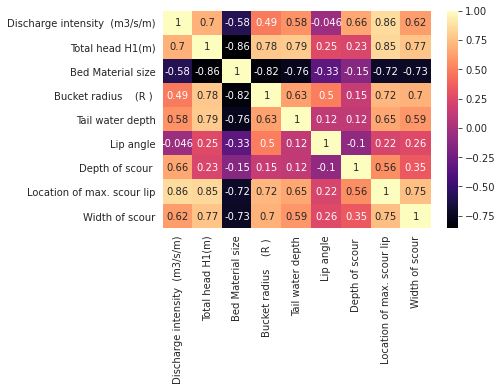

In [7]:
# 1. Heatmap

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


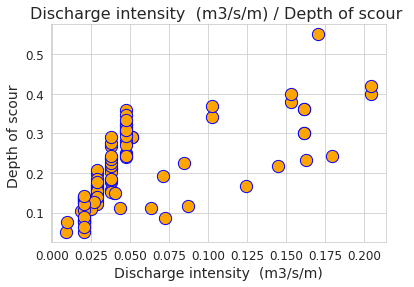

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


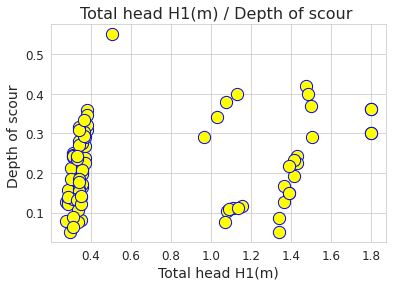

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


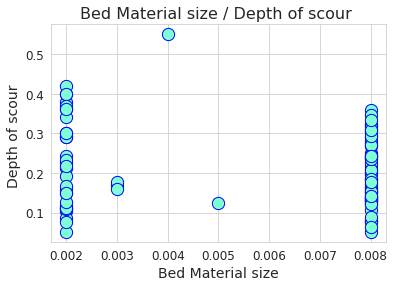

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


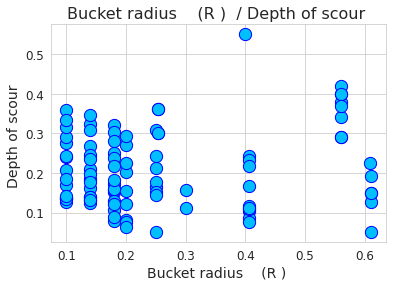

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


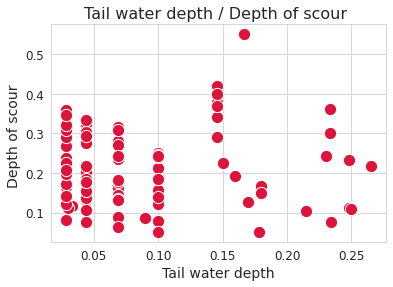

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


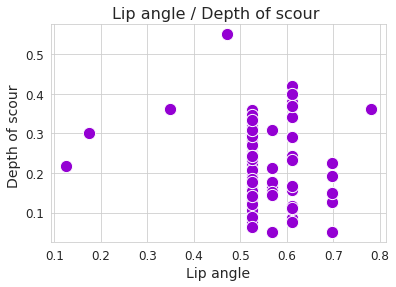

In [8]:
# 2. Scatter plot

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Depth of scour '.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Depth of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Depth of scour '.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Depth of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / Depth of scour '.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Depth of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / Depth of scour '.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Depth of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / Depth of scour '.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Depth of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / Depth of scour '.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Depth of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
scatter_df('Depth of scour ')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


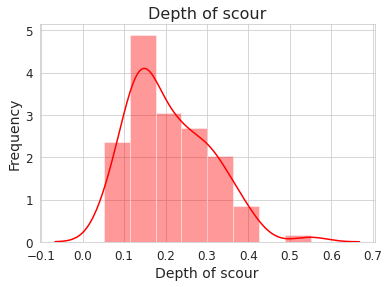

In [9]:
# 3. Distribution plot

sb.distplot(df['Depth of scour '], color = 'r')
plt.title('Depth of scour', fontsize = 16)
plt.xlabel('Depth of scour', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [10]:
# M1
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity  (m3/s/m) Total head H1(m) 
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)']].values
y_var = df['Depth of scour '].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)




# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M1 Depth of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M1 Depth of Scour



,R-squared,RMSE,PCC
OLS,0.337,0.062,0.610
Bayesian,0.337,0.062,0.616
KNN,0.631,0.046,0.812
GradientBoosting,0.768,0.037,0.880
DecisionTree,0.767,0.037,0.888
ExtraTrees,0.757,0.037,0.872
XgBoost,0.657,0.044,0.841
AdaBoost,0.780,0.036,0.886
RandomForest,0.817,0.032,0.904
CatBoostRegressor,0.830,0.031,0.912


In [11]:

# M2
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity  (m3/s/m) Total head H1(m) Bed Material size Bucket radius   
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)', 'Bed Material size']].values
y_var = df['Depth of scour '].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M2 Depth of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M2 Depth of Scour



,R-squared,RMSE,PCC
OLS,0.290,0.064,0.574
Bayesian,0.335,0.062,0.614
KNN,0.621,0.047,0.807
GradientBoosting,0.786,0.035,0.894
DecisionTree,0.767,0.037,0.888
ExtraTrees,0.794,0.034,0.894
XgBoost,0.771,0.036,0.888
AdaBoost,0.770,0.036,0.879
RandomForest,0.845,0.030,0.921
CatBoostRegressor,0.842,0.030,0.925


In [12]:
# M3
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity  (m3/s/m) Total head H1(m) Bed Material size Bucket radius   Bed Material size  Tail water depth
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth']].values
y_var = df['Depth of scour '].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M3 Depth of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M3 Depth of Scour



,R-squared,RMSE,PCC
OLS,0.358,0.061,0.616
Bayesian,0.407,0.058,0.665
KNN,0.754,0.038,0.879
GradientBoosting,0.818,0.032,0.910
DecisionTree,0.746,0.038,0.870
ExtraTrees,0.800,0.034,0.896
XgBoost,0.823,0.032,0.908
AdaBoost,0.788,0.035,0.889
RandomForest,0.798,0.034,0.898
CatBoostRegressor,0.839,0.030,0.920


In [13]:
# M4
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity(m3/s/m): Total head H1(m): Bed Material size Bucket radius: Bed Material size: Tail water depth: Bucket radius(R) 
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth','Bucket radius    (R ) ']].values
y_var = df['Depth of scour '].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M4 Depth of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M4 Depth of Scour



,R-squared,RMSE,PCC
OLS,0.358,0.061,0.621
Bayesian,0.412,0.058,0.677
KNN,0.663,0.044,0.885
GradientBoosting,0.897,0.024,0.949
DecisionTree,0.869,0.027,0.937
ExtraTrees,0.948,0.017,0.976
XgBoost,0.878,0.026,0.944
AdaBoost,0.818,0.032,0.933
RandomForest,0.887,0.026,0.953
CatBoostRegressor,0.893,0.025,0.949


In [14]:
# M5
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity(m3/s/m): Total head H1(m): Bed Material size Bucket radius: Bed Material size: Tail water depth: Bucket radius(R): Lip Angle
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth','Bucket radius    (R ) ', 'Lip angle']].values
y_var = df['Depth of scour '].values




X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M5 Depth of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M5 Depth of Scour



,R-squared,RMSE,PCC
OLS,0.336,0.062,0.605
Bayesian,0.399,0.059,0.674
KNN,0.669,0.044,0.901
GradientBoosting,0.923,0.021,0.965
DecisionTree,0.786,0.035,0.901
ExtraTrees,0.921,0.021,0.961
XgBoost,0.910,0.023,0.957
AdaBoost,0.832,0.031,0.928
RandomForest,0.887,0.026,0.945
CatBoostRegressor,0.907,0.023,0.956


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


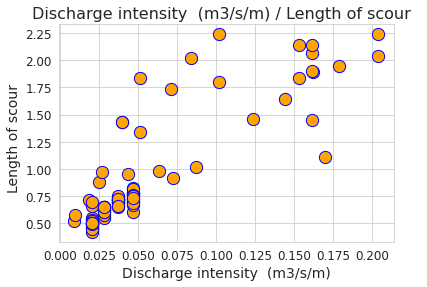

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


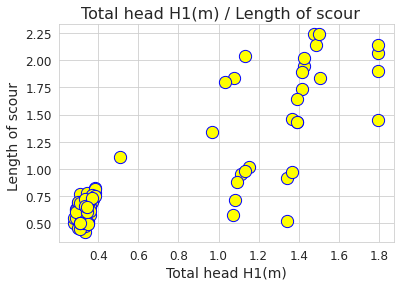

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


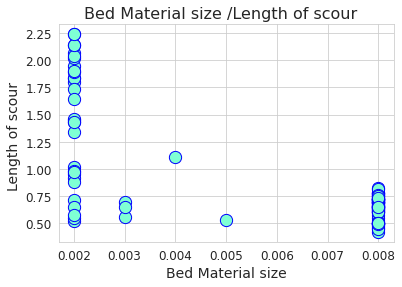

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


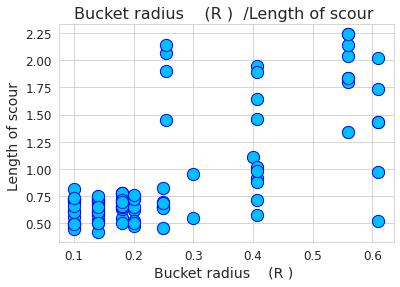

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


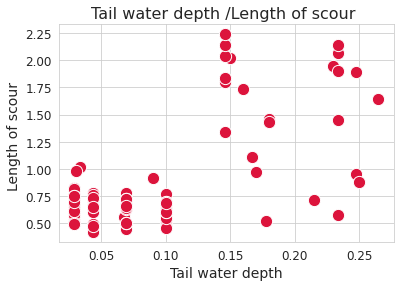

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


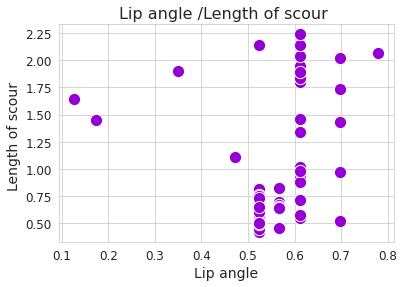

In [15]:
# 2. Scatter plot

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Length of scour  '.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Length of scour  ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Length of scour  '.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Length of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} /Length of scour  '.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Length of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} /Length of scour '.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Length of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} /Length of scour '.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Length of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} /Length of scour '.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Length of scour ', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
scatter_df('Location of max. scour lip')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


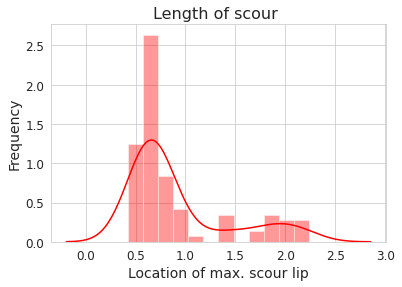

In [16]:
# 3. Distribution plot

sb.distplot(df['Location of max. scour lip'], color = 'r')
plt.title('Length of scour ', fontsize = 16)
plt.xlabel('Location of max. scour lip', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('displot.png')
plt.show()

In [17]:
# M1
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity  (m3/s/m) Total head H1(m) 
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)']].values
y_var = df['Location of max. scour lip'].values



X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M1 Length of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M1 Length of Scour



,R-squared,RMSE,PCC
OLS,0.862,0.159,0.935
Bayesian,0.863,0.159,0.935
KNN,0.872,0.154,0.946
GradientBoosting,0.911,0.128,0.955
DecisionTree,0.889,0.143,0.943
ExtraTrees,0.894,0.140,0.951
XgBoost,0.926,0.117,0.970
AdaBoost,0.879,0.149,0.950
RandomForest,0.884,0.146,0.941
CatBoostRegressor,0.956,0.090,0.983


In [18]:
# M2
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity  (m3/s/m) Total head H1(m) Bed Material size Bucket radius   
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)', 'Bed Material size']].values
y_var = df['Location of max. scour lip'].values



X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M2 Length of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M2 Length of Scour



,R-squared,RMSE,PCC
OLS,0.857,0.162,0.931
Bayesian,0.863,0.159,0.935
KNN,0.873,0.153,0.946
GradientBoosting,0.910,0.128,0.955
DecisionTree,0.889,0.143,0.943
ExtraTrees,0.905,0.132,0.963
XgBoost,0.936,0.109,0.975
AdaBoost,0.859,0.161,0.932
RandomForest,0.914,0.125,0.962
CatBoostRegressor,0.960,0.086,0.986


In [19]:
# M3
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity  (m3/s/m) Total head H1(m) Bed Material size Bucket radius   Bed Material size  Tail water depth
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth']].values
y_var = df['Location of max. scour lip'].values




X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M3 Length of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M3 Length of Scour



,R-squared,RMSE,PCC
OLS,0.861,0.160,0.935
Bayesian,0.865,0.157,0.937
KNN,0.926,0.117,0.964
GradientBoosting,0.922,0.120,0.968
DecisionTree,0.900,0.136,0.962
ExtraTrees,0.945,0.101,0.976
XgBoost,0.969,0.076,0.986
AdaBoost,0.916,0.124,0.964
RandomForest,0.946,0.100,0.975
CatBoostRegressor,0.978,0.064,0.990


In [20]:
# M4
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity(m3/s/m): Total head H1(m): Bed Material size Bucket radius: Bed Material size: Tail water depth: Bucket radius(R) 
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth','Bucket radius    (R ) ']].values
y_var = df['Location of max. scour lip'].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M4 Length of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M4 Length of Scour



,R-squared,RMSE,PCC
OLS,0.907,0.131,0.960
Bayesian,0.910,0.129,0.963
KNN,0.933,0.111,0.973
GradientBoosting,0.922,0.120,0.969
DecisionTree,0.882,0.147,0.960
ExtraTrees,0.942,0.104,0.976
XgBoost,0.977,0.065,0.990
AdaBoost,0.870,0.155,0.938
RandomForest,0.947,0.098,0.977
CatBoostRegressor,0.983,0.056,0.993


In [21]:
# M5
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity(m3/s/m): Total head H1(m): Bed Material size Bucket radius: Bed Material size: Tail water depth: Bucket radius(R): Lip Angle
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth','Bucket radius    (R ) ', 'Lip angle']].values
y_var = df['Location of max. scour lip'].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M5 Length of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M5 Length of Scour



,R-squared,RMSE,PCC
OLS,0.908,0.130,0.962
Bayesian,0.911,0.128,0.966
KNN,0.882,0.147,0.951
GradientBoosting,0.882,0.147,0.940
DecisionTree,0.829,0.178,0.911
ExtraTrees,0.965,0.080,0.988
XgBoost,0.965,0.080,0.986
AdaBoost,0.860,0.160,0.928
RandomForest,0.918,0.123,0.962
CatBoostRegressor,0.975,0.068,0.991


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


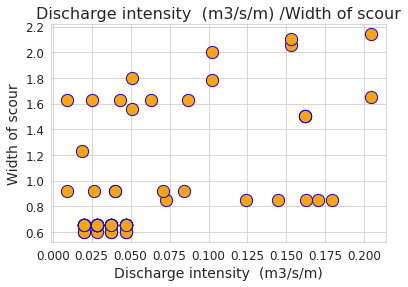

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


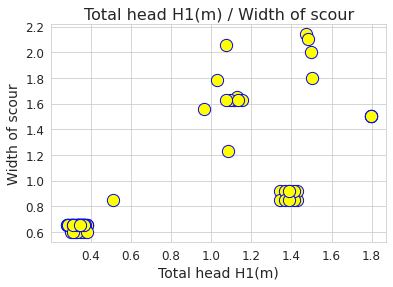

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


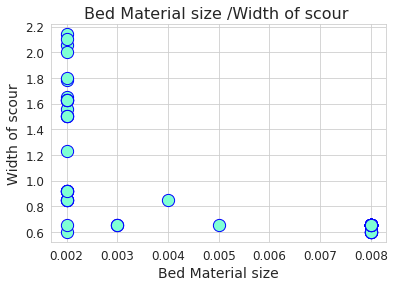

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


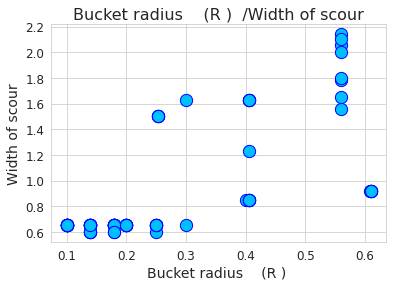

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


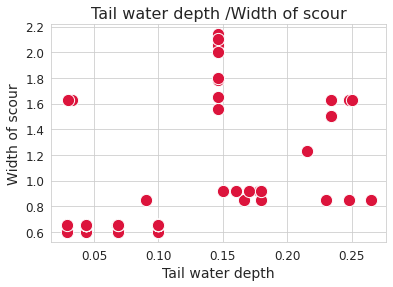

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


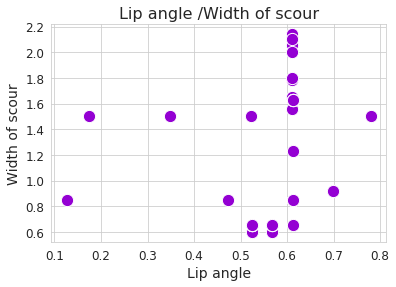

In [22]:
# 2. Scatter plot

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} /Width of scour'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Width of scour', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Width of scour'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Width of scour', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} /Width of scour '.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Width of scour', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} /Width of scour'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Width of scour', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} /Width of scour'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Width of scour', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} /Width of scour'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Width of scour', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
scatter_df('Width of scour')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


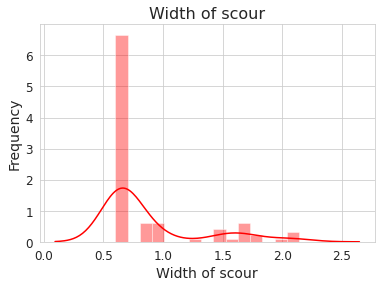

In [23]:
# 3. Distribution plot

sb.distplot(df['Width of scour'], color = 'r')
plt.title('Width of scour', fontsize = 16)
plt.xlabel('Width of scour', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [24]:
# M1
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity  (m3/s/m) Total head H1(m) 
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)']].values
y_var = df['Width of scour'].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M1 Width of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M1 Width of Scour



,R-squared,RMSE,PCC
OLS,0.531,0.208,0.772
Bayesian,0.512,0.213,0.770
KNN,0.777,0.144,0.904
GradientBoosting,0.995,0.022,0.998
DecisionTree,0.992,0.027,0.997
ExtraTrees,0.986,0.037,0.993
XgBoost,0.969,0.054,0.985
AdaBoost,0.976,0.047,0.988
RandomForest,0.994,0.024,0.997
CatBoostRegressor,0.972,0.051,0.987


In [25]:
# M2
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity  (m3/s/m) Total head H1(m) Bed Material size Bucket radius   
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)', 'Bed Material size']].values
y_var = df['Width of scour'].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M2 Width of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M2 Width of Scour



,R-squared,RMSE,PCC
OLS,0.582,0.197,0.800
Bayesian,0.512,0.213,0.770
KNN,0.778,0.143,0.904
GradientBoosting,0.985,0.037,0.995
DecisionTree,0.992,0.027,0.997
ExtraTrees,0.981,0.042,0.991
XgBoost,0.949,0.069,0.978
AdaBoost,0.984,0.038,0.992
RandomForest,0.994,0.024,0.997
CatBoostRegressor,0.991,0.029,0.996


In [26]:
# M3
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity  (m3/s/m) Total head H1(m) Bed Material size Bucket radius   Bed Material size  Tail water depth
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth']].values
y_var = df['Width of scour'].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M3 Width of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M3 Width of Scour



,R-squared,RMSE,PCC
OLS,0.453,0.225,0.746
Bayesian,0.483,0.219,0.755
KNN,0.679,0.172,0.827
GradientBoosting,0.878,0.106,0.947
DecisionTree,0.430,0.230,0.851
ExtraTrees,0.878,0.106,0.953
XgBoost,0.843,0.120,0.928
AdaBoost,0.581,0.197,0.855
RandomForest,0.849,0.118,0.935
CatBoostRegressor,0.913,0.090,0.958


In [27]:
# M4
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity(m3/s/m): Total head H1(m): Bed Material size Bucket radius: Bed Material size: Tail water depth: Bucket radius(R) 
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth','Bucket radius    (R ) ']].values
y_var = df['Width of scour'].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M4 Width of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M4 Width of Scour



,R-squared,RMSE,PCC
OLS,0.284,0.258,0.687
Bayesian,0.300,0.255,0.698
KNN,0.623,0.187,0.800
GradientBoosting,0.869,0.110,0.946
DecisionTree,0.430,0.230,0.851
ExtraTrees,0.954,0.065,0.979
XgBoost,0.842,0.121,0.930
AdaBoost,0.560,0.202,0.852
RandomForest,0.733,0.157,0.889
CatBoostRegressor,0.912,0.090,0.956


In [28]:
# M5
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity(m3/s/m): Total head H1(m): Bed Material size Bucket radius: Bed Material size: Tail water depth: Bucket radius(R): Lip Angle
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth','Bucket radius    (R ) ', 'Lip angle']].values
y_var = df['Width of scour'].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)


# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

#3. KNN regressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsRegressor()  
model.fit(X_train_scaled,y_train)
model_yhat = model.predict(X_test_scaled)


# 4. GradientBoostingRegressor
param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_gbm =GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_gbm.fit(X_train, y_train)

#find the best model of grid search
gbm_best=grid_search_gbm.best_estimator_

gbm=gbm_best.fit(X_train, y_train)
gbm_yhat = gbm.predict(X_test)

#5. DecisionTree Regressor

param_grid=[
{'ccp_alpha': [0.0,0.5],
 'max_depth': [None,100,20,10,500],
 'max_leaf_nodes':[5,10,15,30],
 'random_state': [0,1]}
] 
grid_search_dcn = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_dcn.fit(X_train, y_train)

#find the best model of grid search
dcn_best=grid_search_dcn.best_estimator_

dcn=dcn_best.fit(X_train, y_train)
dcn_yhat = dcn.predict(X_test)

#6. ExtraTrees Regressor

param_grid = [
{'n_estimators': [10, 25, 400], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_e_regr = GridSearchCV(ensemble.ExtraTreesRegressor(), param_grid, n_jobs=4,cv=3,scoring='r2')
grid_search_e_regr.fit(X_train, y_train)

#find the best model of grid search
e_regr_best=grid_search_e_regr.best_estimator_

e_regr=e_regr_best.fit(X_train, y_train)
e_regr_yhat = e_regr.predict(X_test)

#7. XGBRegressor


# Various hyper-parameters to tune
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7,0],
              'n_estimators': [500,100,1000]}

xgb_grid = GridSearchCV(xg.XGBRegressor(),parameters,cv = 2,n_jobs = 5,scoring='r2')

xgb_grid.fit(X_train, y_train)
xgb_best =  xgb_grid.best_estimator_
xgb_r_yhat = xgb_best.predict(X_test)

#8. AdaBoostRegressor

param_grid = [
{'base_estimator': [2,None],
 'learning_rate': [0.8,0.2],
 'loss': ['exponential'],
 'n_estimators': [10,50],
 'random_state':[1, None]}
]

ada_search = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1,scoring='r2')
ada_search.fit(X_train, y_train)

#find the best model of grid search
ada_best=ada_search.best_estimator_

ada=ada_best.fit(X_train, y_train)
ada_yhat=ada.predict(X_test)

#9. RandomForest Regressor

param_grid = [
{'n_estimators': [10, 25, 400],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search_forest.fit(X_train, y_train)


#find the best model of grid search
rand_best=grid_search_forest.best_estimator_

rand_regr=rand_best.fit(X_train, y_train)
rand_regr_yhat = rand_regr.predict(X_test)


#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)

#1 R-squared

r2Ols=r2(y_test, ols_yhat)
r2Bayesian=r2(y_test, bayesian_yhat)
r2KNN=r2(y_test, model_yhat)
r2GBM=r2(y_test, gbm_yhat)
r2Dcn=r2(y_test, dcn_yhat)
r2ExtraTrees=r2(y_test, e_regr_yhat)
r2XGB=r2(y_test, xgb_r_yhat)
r2Ada=r2(y_test, ada_yhat)
r2RandomForest=r2(y_test, rand_regr_yhat)
r2CBR=r2(y_test, cbr_yhat)


#2. RMSE
rmseOls=np.sqrt(MSE(y_test, ols_yhat))
rmseBayesian=np.sqrt(MSE(y_test, bayesian_yhat))
rmseKNN=np.sqrt(MSE(y_test, model_yhat))
rmseGBM=np.sqrt(MSE(y_test, gbm_yhat))
rmseDcn=np.sqrt(MSE(y_test,dcn_yhat))
rmseExtraTrees=np.sqrt(MSE(y_test, e_regr_yhat))
rmseXGB=np.sqrt(MSE(y_test, xgb_r_yhat))
rmseAda=np.sqrt(MSE(y_test, ada_yhat))
rmseRandomForest=np.sqrt(MSE(y_test, rand_regr_yhat))
rmseCBR=np.sqrt(MSE(y_test, cbr_yhat))


#3 PCC

from scipy.stats import pearsonr
corrOls, _ = pearsonr(ols_yhat, y_test)
corrBayesian, _ = pearsonr(bayesian_yhat, y_test)
corrKNN, _ = pearsonr(model_yhat, y_test)
corrGBM, _ = pearsonr(gbm_yhat, y_test)
corrDcn, _ = pearsonr(dcn_yhat, y_test)
corrExtraTrees, _ = pearsonr(e_regr_yhat, y_test)
corrXGB, _ = pearsonr(xgb_r_yhat, y_test)
corrAda, _ = pearsonr(ada_yhat, y_test)
corrRandomForest, _ = pearsonr(rand_regr_yhat, y_test)
corrCBR, _ = pearsonr(cbr_yhat, y_test)

print(cl('\t   M5 Width of Scour\n', attrs = ['bold']))

# initialise data of lists.
data1 ={
   "R-squared": [r2Ols,r2Bayesian,r2KNN,r2GBM,r2Dcn,r2ExtraTrees,r2XGB,r2Ada,r2RandomForest,r2CBR],
   "RMSE": [rmseOls,rmseBayesian,rmseKNN,rmseGBM,rmseDcn,rmseExtraTrees,rmseXGB,rmseAda,rmseRandomForest,rmseCBR],
   "PCC" :[corrOls,corrBayesian,corrKNN,corrGBM,corrDcn,corrExtraTrees,corrXGB,corrAda,corrRandomForest,corrCBR]
}

# Creates pandas DataFrame.
df2= pd.DataFrame(data1, index =['OLS','Bayesian','KNN','GradientBoosting','DecisionTree','ExtraTrees','XgBoost','AdaBoost','RandomForest','CatBoostRegressor'])
df2=df2.round(3)
df2


	   M5 Width of Scour



,R-squared,RMSE,PCC
OLS,0.280,0.258,0.684
Bayesian,0.307,0.253,0.701
KNN,0.672,0.174,0.839
GradientBoosting,0.932,0.079,0.970
DecisionTree,0.971,0.052,0.991
ExtraTrees,0.959,0.062,0.980
XgBoost,0.911,0.091,0.959
AdaBoost,0.950,0.068,0.979
RandomForest,0.834,0.124,0.934
CatBoostRegressor,0.945,0.071,0.973


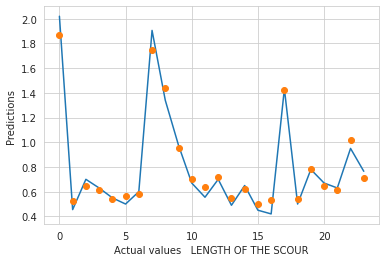

In [29]:
# M5
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity(m3/s/m): Total head H1(m): Bed Material size Bucket radius: Bed Material size: Tail water depth: Bucket radius(R): Lip Angle
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth','Bucket radius    (R ) ', 'Lip angle']].values
y_var = df['Location of max. scour lip'].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)

#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)


import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(cbr_yhat, 'o')
plt.xlabel('Actual values   LENGTH OF THE SCOUR')
plt.ylabel('Predictions ')

plt.show()


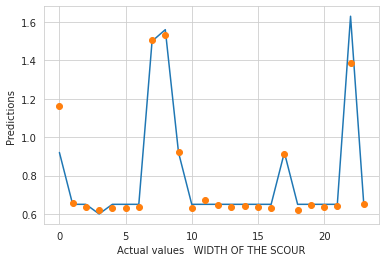

In [30]:
# M5
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity(m3/s/m): Total head H1(m): Bed Material size Bucket radius: Bed Material size: Tail water depth: Bucket radius(R): Lip Angle
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth','Bucket radius    (R ) ', 'Lip angle']].values
y_var = df['Width of scour'].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)



#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)


import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(cbr_yhat, 'o')
plt.xlabel('Actual values   WIDTH OF THE SCOUR')
plt.ylabel('Predictions ')

plt.show()

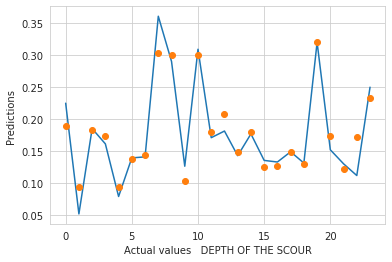

In [31]:
# M5
# FEATURE SELECTION & DATA SPLIT 
# Discharge intensity(m3/s/m): Total head H1(m): Bed Material size Bucket radius: Bed Material size: Tail water depth: Bucket radius(R): Lip Angle
X_var = df[['Discharge intensity  (m3/s/m)', 'Total head H1(m)','Bed Material size', 'Tail water depth','Bucket radius    (R ) ', 'Lip angle']].values
y_var = df['Depth of scour '].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 0)

#10. CatBoost Regressor

param_grid= [
{'logging_level': ['Silent'],
'random_state': [45,10,65], 
'early_stopping_rounds': [300,400,100]}
]
grid_search_cbr = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='r2')
grid_search_cbr.fit(X_train, y_train)


#find the best model of grid search
cbr_best=grid_search_cbr.best_estimator_

cbr=cbr_best.fit(X_train, y_train)
cbr_yhat = cbr.predict(X_test)


import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(cbr_yhat, 'o')
plt.xlabel('Actual values   DEPTH OF THE SCOUR')
plt.ylabel('Predictions ')

plt.show()